 1.Choose a binary classification dataset.

In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)


 2.Train/test split and standardize features.


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


 3.Fit a Logistic Regression model.


In [6]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X_train_scaled, y_train)


LogisticRegression()

 4.Evaluate with confusion matrix, precision, reca l, ROC-AUC.


Confusion Matrix:
[[41  2]
 [ 1 70]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

ROC-AUC Score: 1.00


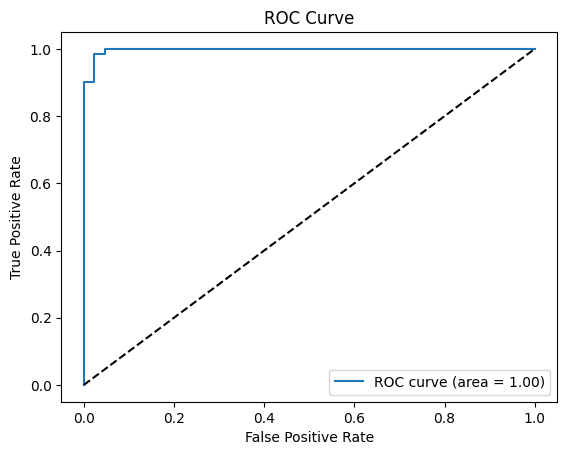

In [4]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

y_pred = clf.predict(X_test_scaled)
y_prob = clf.predict_proba(X_test_scaled)[:, 1]

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

roc_auc = roc_auc_score(y_test, y_prob)
print(f"ROC-AUC Score: {roc_auc:.2f}")

fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


 5.Tune threshold and explain sigmoid function.


In [5]:
import numpy as np
from sklearn.metrics import precision_score, recall_score

threshold = 0.2
y_pred_thresh = (y_prob >= threshold).astype(int)

print("Confusion Matrix (Threshold 0.3):")
print(confusion_matrix(y_test, y_pred_thresh))

print(f"Precision: {precision_score(y_test, y_pred_thresh):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_thresh):.2f}")


Confusion Matrix (Threshold 0.3):
[[40  3]
 [ 0 71]]
Precision: 0.96
Recall: 1.00
